# Preprocessing(2) & Analysis 

## Importing Necessary Libraries

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sb
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Data

In [90]:
df = pd.read_csv('preprocessed_game_info.csv')

In [91]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # Handle the error if conversion to numeric fails
            print(f"Conversion failed for column: {column}")

Conversion failed for column: NAME
Conversion failed for column: STORE_GENRE
Conversion failed for column: DEVELOPERS
Conversion failed for column: TECHNOLOGIES
Conversion failed for column: TOTAL_TWITCH_PEAK


In [92]:
feature_colors = sns.color_palette('hls', n_colors=len(df.columns))
features = df.columns
feature_color_map = dict(zip(features, feature_colors))
feature_colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5661999999999999, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.7638, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.3738000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6962000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6337999999999998, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.43619999999999975, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.8261999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5037999999999996)]

## Initial Data Exploration

In [93]:
df.head()

NAME  \
0  Dragon's Dogma: Dark Arisen   
1              Forza Horizon 5   
2                       Thrive   
3        Layers of Fear (2016)   
4                     TaskPals   

                                         STORE_GENRE  RATING_SCORE  \
0                    [' Action', 'Adventure', 'RPG']           8.0   
1  [' Action', 'Adventure', 'Racing', 'Simulation...           8.0   
2  [' Casual', 'Indie', 'Simulation', 'Early Acce...           8.0   
3                            [' Adventure', 'Indie']           8.0   
4                         [' Indie', 'Free to Play']           8.0   

   N_SUPPORTED_LANGUAGES                  DEVELOPERS  POSITIVE_REVIEWS  \
0                      7                      Capcom             39271   
1                     24            Playground Games            156683   
2                      1  Revolutionary Games Studio               872   
3                     12             Bloober Team SA             22766   
4                      1                    lazarche               834   

   NEGATIVE_REVIEWS                                       TECHNOLOGIES  \
0              5015                                                 []   
1             21075                                                 []   
2                70                                   ['Engine.Godot']   
3              2819                                   ['Engine.Unity']   
4                66  ['Detected Technologies (?)', 'SDK.SteamworksN...   

                                   TOTAL_TWITCH_PEAK  PRICE  24_HOUR_PEAK  \
0   27,368\nall-time peak 9 years ago17 January 2016  22.49          1064   
1  81,096\nall-time peak 3 years ago13 November 2021  32.78         16131   
2         145\nall-time peak 2 years ago24 July 2022   2.99            21   
3     145,384\nall-time peak 6 years ago13 June 2018  10.19            31   
4     3,778\nall-time peak 10 months ago18 July 2023   0.00           318   

   PUBLISH_YEAR  Linux  Windows  macOS  TOTAL_REVIEW  
0          2016      0        1      0      0.886759  
1          2021      0        1      0      0.881440  
2          2021      1        1      0      0.925690  
3          2016      1        1      1      0.889818  
4          2023      0        1      0      0.926667

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2008 non-null   object 
 1   STORE_GENRE            2008 non-null   object 
 2   RATING_SCORE           2008 non-null   float64
 3   N_SUPPORTED_LANGUAGES  2008 non-null   int64  
 4   DEVELOPERS             2008 non-null   object 
 5   POSITIVE_REVIEWS       2008 non-null   int64  
 6   NEGATIVE_REVIEWS       2008 non-null   int64  
 7   TECHNOLOGIES           2008 non-null   object 
 8   TOTAL_TWITCH_PEAK      2008 non-null   object 
 9   PRICE                  2008 non-null   float64
 10  24_HOUR_PEAK           2008 non-null   int64  
 11  PUBLISH_YEAR           2008 non-null   int64  
 12  Linux                  2008 non-null   int64  
 13  Windows                2008 non-null   int64  
 14  macOS                  2008 non-null   int64  
 15  TOTA

## Plot the Count of Unique Values for Each Feature 

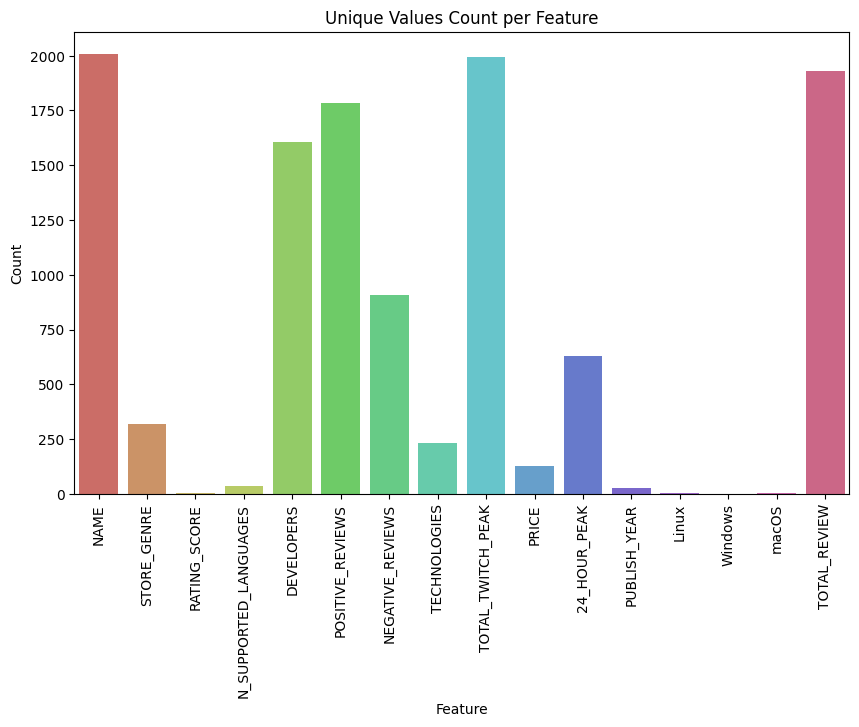

In [95]:
unique_counts = df.nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=feature_colors)
plt.xticks(rotation=90)
plt.title('Unique Values Count per Feature')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.show()

## Title for Excluding Specific Columns from Numerical Column Selection

In [96]:
exclude_columns=['Windows', 'macOS', 'Linux']
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
numerical_df = df[numerical_columns]

## Outlier Detection and Handling

In [97]:
def plot_boxplots(df, exclude_columns=[]):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    num_columns = len(numerical_columns)
    
    num_rows = (num_columns + 2) // 3
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5 * num_rows))
    axes = axes.flatten() 
    
    for i, column in enumerate(numerical_columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

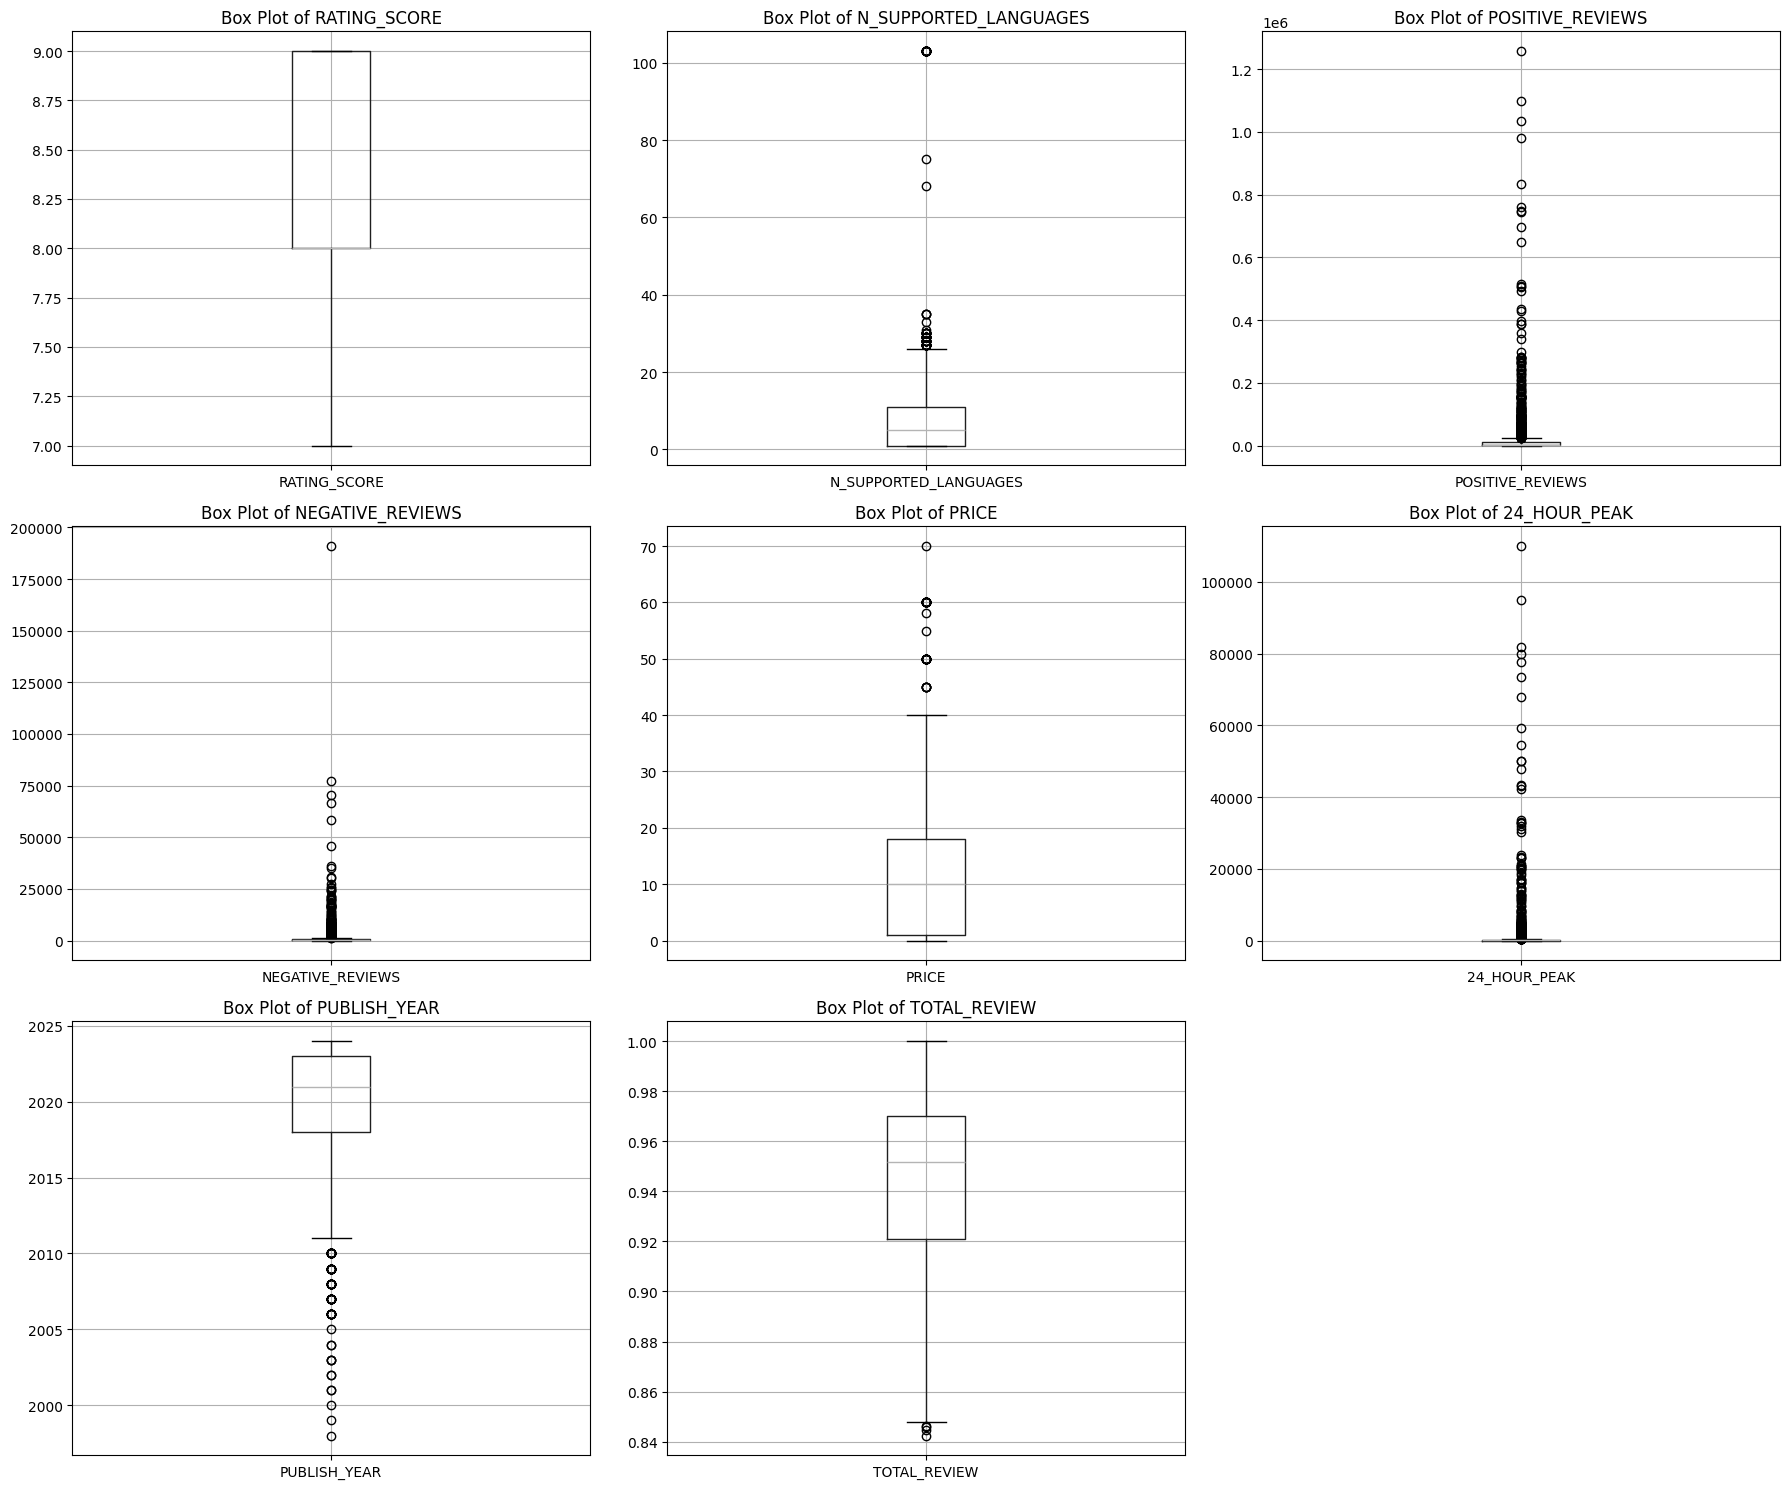

In [98]:
plot_boxplots(df, exclude_columns=['Windows', 'macOS', 'Linux'])


In [99]:
def suggest_outlier_handling_method(df, exclude_columns=[]):
    methods = {}
    
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    
    for column in numerical_columns:
        # Plot histogram and box plot
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(df[column], bins=30, kde=True, ax=ax[0])
        ax[0].set_title(f'Histogram of {column}')
        sns.boxplot(x=df[column], ax=ax[1])
        ax[1].set_title(f'Box Plot of {column}')
        plt.show()
        
        # Calculate basic statistics
        mean = df[column].mean()
        median = df[column].median()
        std = df[column].std()
        
        print(f'{column} Statistics:')
        print(f'Mean: {mean}, Median: {median}, Standard Deviation: {std}')
        
        # Determine outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        print(f'Number of Outliers: {len(outliers)}')
        
        if len(outliers) / len(df) < 0.05:
            if abs(mean - median) / std > 0.5:
                methods[column] = 'transform'
            else:
                methods[column] = 'remove'
        else:
            methods[column] = 'cap'
        
        print(f'Suggested Method for {column}: {methods[column]}')
        print('-' * 40)
    
    return methods

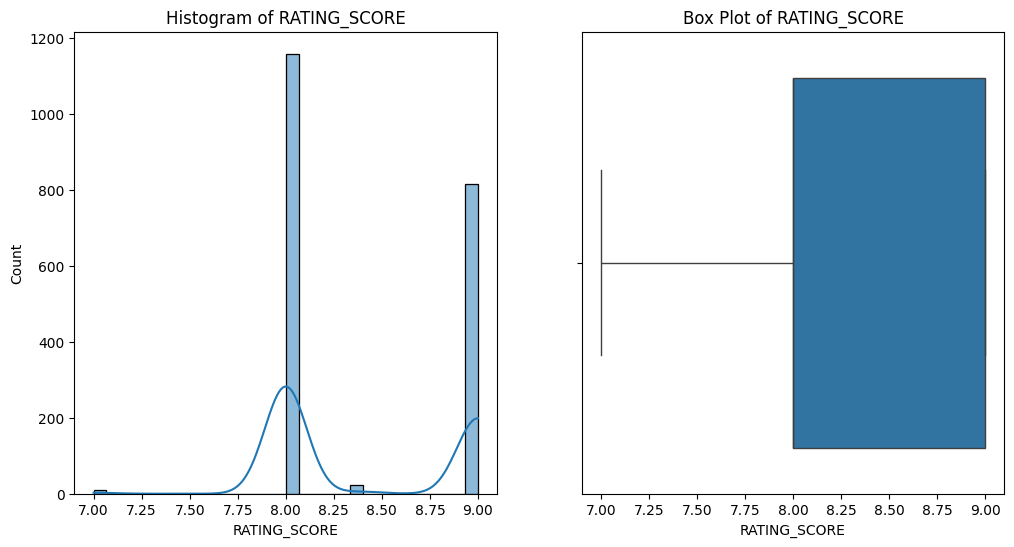

RATING_SCORE Statistics:
Mean: 8.405182917963183, Median: 8.0, Standard Deviation: 0.4994804214737655
Number of Outliers: 0
Suggested Method for RATING_SCORE: transform
----------------------------------------


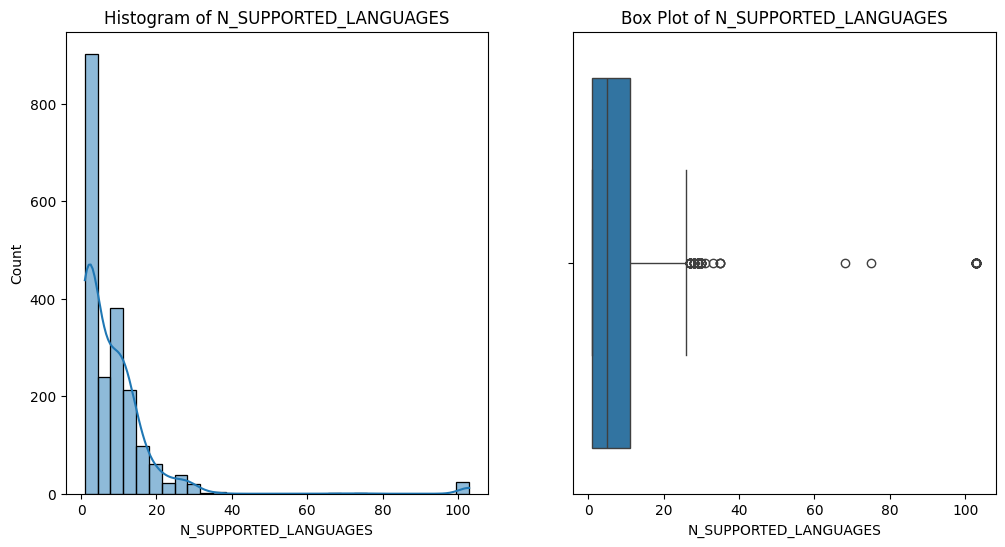

N_SUPPORTED_LANGUAGES Statistics:
Mean: 8.465139442231076, Median: 5.0, Standard Deviation: 12.489668072072659
Number of Outliers: 71
Suggested Method for N_SUPPORTED_LANGUAGES: remove
----------------------------------------


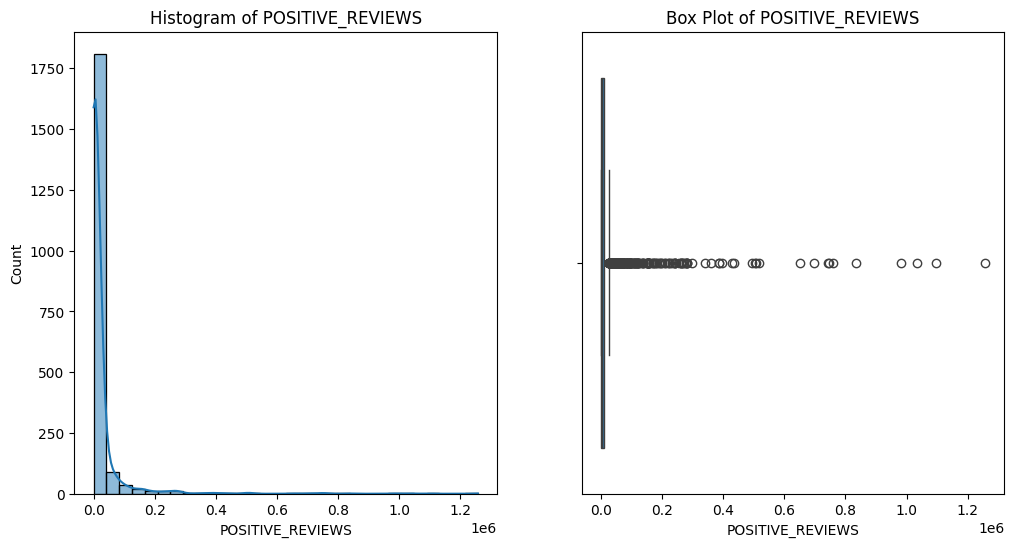

POSITIVE_REVIEWS Statistics:
Mean: 21438.147410358564, Median: 2701.5, Standard Deviation: 78676.93633219339
Number of Outliers: 275
Suggested Method for POSITIVE_REVIEWS: cap
----------------------------------------


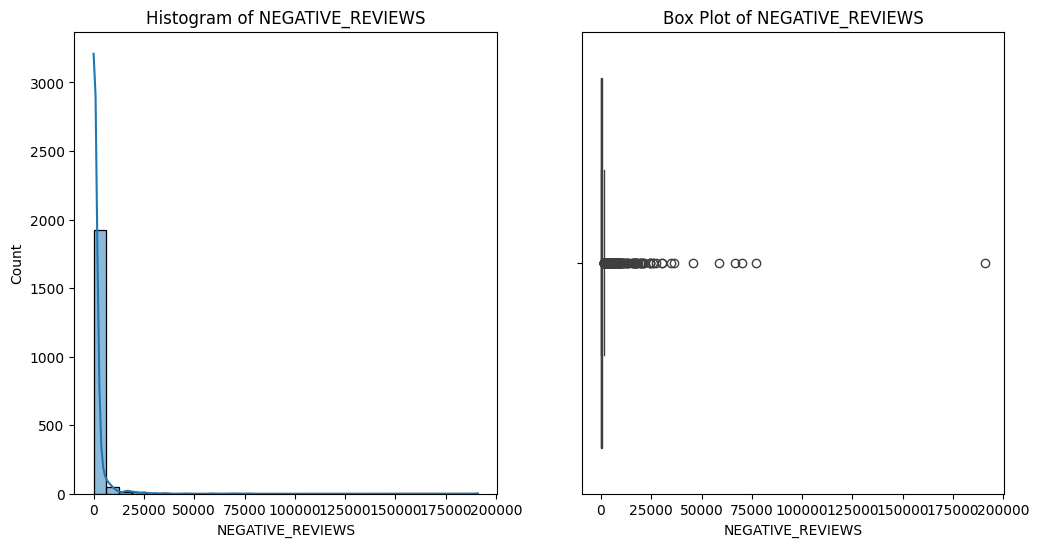

NEGATIVE_REVIEWS Statistics:
Mean: 1309.73406374502, Median: 138.5, Standard Deviation: 6129.534048702667
Number of Outliers: 290
Suggested Method for NEGATIVE_REVIEWS: cap
----------------------------------------


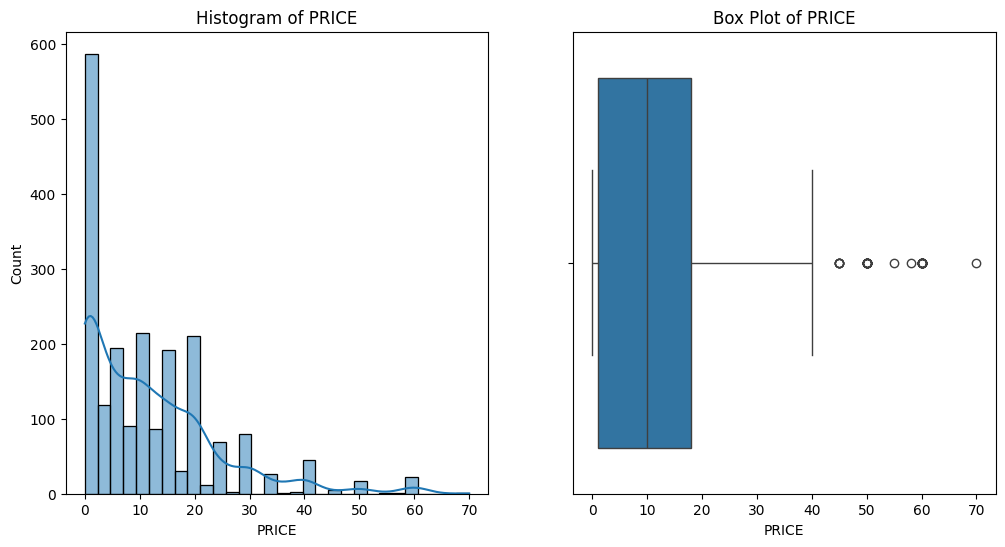

PRICE Statistics:
Mean: 11.526812749003986, Median: 9.99, Standard Deviation: 12.088032319696605
Number of Outliers: 47
Suggested Method for PRICE: remove
----------------------------------------


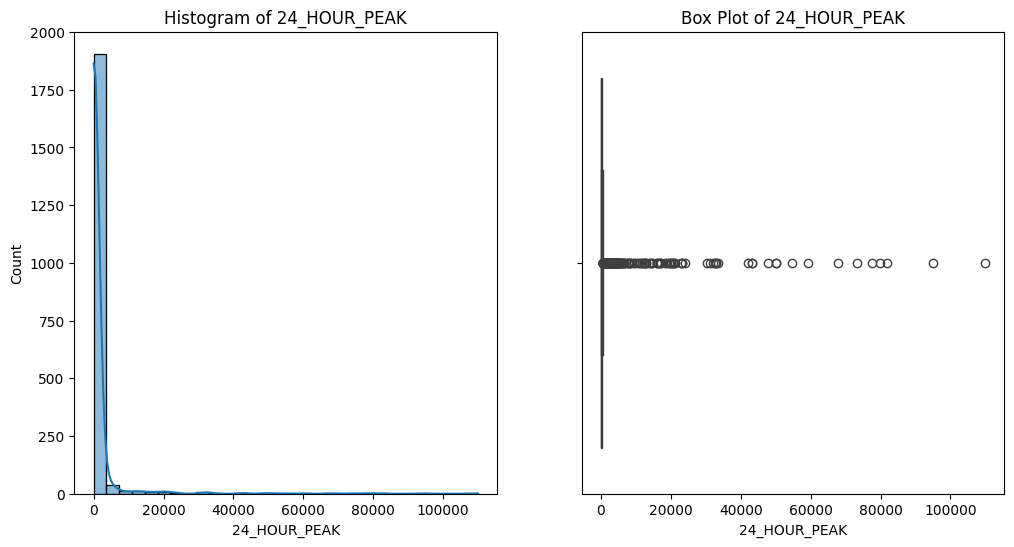

24_HOUR_PEAK Statistics:
Mean: 1217.2569721115538, Median: 36.0, Standard Deviation: 6546.015576056498
Number of Outliers: 326
Suggested Method for 24_HOUR_PEAK: cap
----------------------------------------


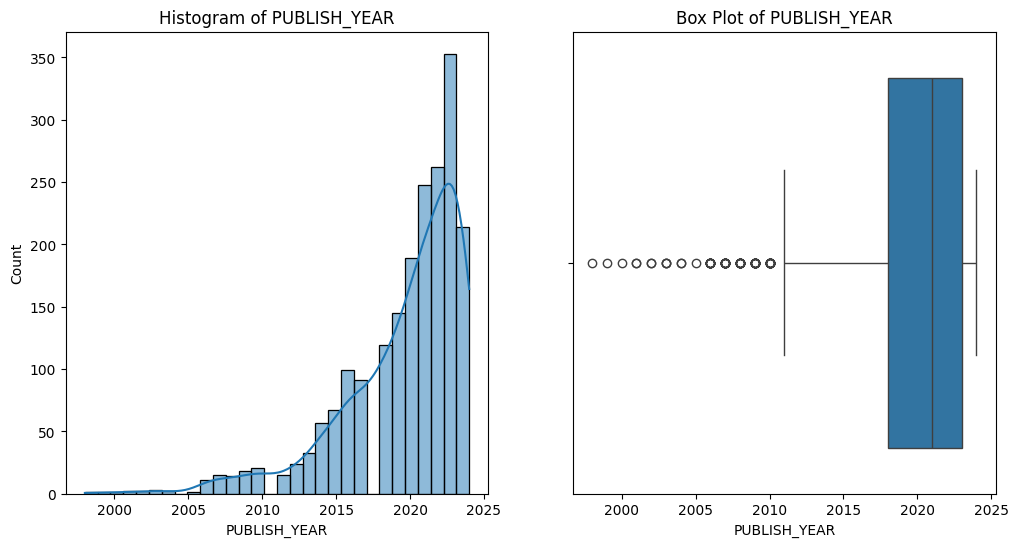

PUBLISH_YEAR Statistics:
Mean: 2019.6215139442231, Median: 2021.0, Standard Deviation: 4.116656566233051
Number of Outliers: 92
Suggested Method for PUBLISH_YEAR: remove
----------------------------------------


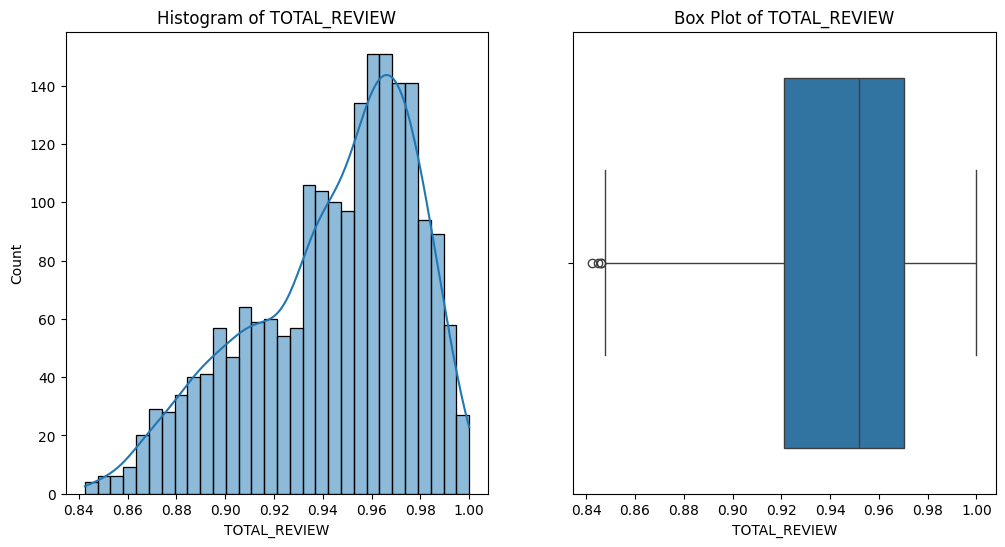

TOTAL_REVIEW Statistics:
Mean: 0.9440986668871225, Median: 0.951833636808732, Standard Deviation: 0.033790374207674057
Number of Outliers: 4
Suggested Method for TOTAL_REVIEW: remove
----------------------------------------


In [100]:
suggested_methods = suggest_outlier_handling_method(df, exclude_columns=['Windows', 'macOS', 'Linux'])


In [101]:
suggested_methods

{'RATING_SCORE': 'transform',
 'N_SUPPORTED_LANGUAGES': 'remove',
 'POSITIVE_REVIEWS': 'cap',
 'NEGATIVE_REVIEWS': 'cap',
 'PRICE': 'remove',
 '24_HOUR_PEAK': 'cap',
 'PUBLISH_YEAR': 'remove',
 'TOTAL_REVIEW': 'remove'}

In [102]:
def handle_outliers(df, methods, exclude_columns=[]):

    df_cleaned = df.copy()  
    
    for column, method in methods.items():
        if column in exclude_columns:
            continue
        
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if method == 'remove':
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        elif method == 'cap':
            df_cleaned[column] = df_cleaned[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        elif method == 'transform':
            df_cleaned[column] = np.log1p(df_cleaned[column])  
        else:
            raise ValueError("Method must be either 'remove', 'cap', or 'transform'")
    
    return df_cleaned

In [103]:
df = handle_outliers(df, suggested_methods, exclude_columns=['Windows', 'Mac', 'Linux', 'PRICE'])


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1846 entries, 0 to 2007
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   1846 non-null   object 
 1   STORE_GENRE            1846 non-null   object 
 2   RATING_SCORE           1846 non-null   float64
 3   N_SUPPORTED_LANGUAGES  1846 non-null   int64  
 4   DEVELOPERS             1846 non-null   object 
 5   POSITIVE_REVIEWS       1846 non-null   float64
 6   NEGATIVE_REVIEWS       1846 non-null   float64
 7   TECHNOLOGIES           1846 non-null   object 
 8   TOTAL_TWITCH_PEAK      1846 non-null   object 
 9   PRICE                  1846 non-null   float64
 10  24_HOUR_PEAK           1846 non-null   float64
 11  PUBLISH_YEAR           1846 non-null   int64  
 12  Linux                  1846 non-null   int64  
 13  Windows                1846 non-null   int64  
 14  macOS                  1846 non-null   int64  
 15  TOTAL_REV

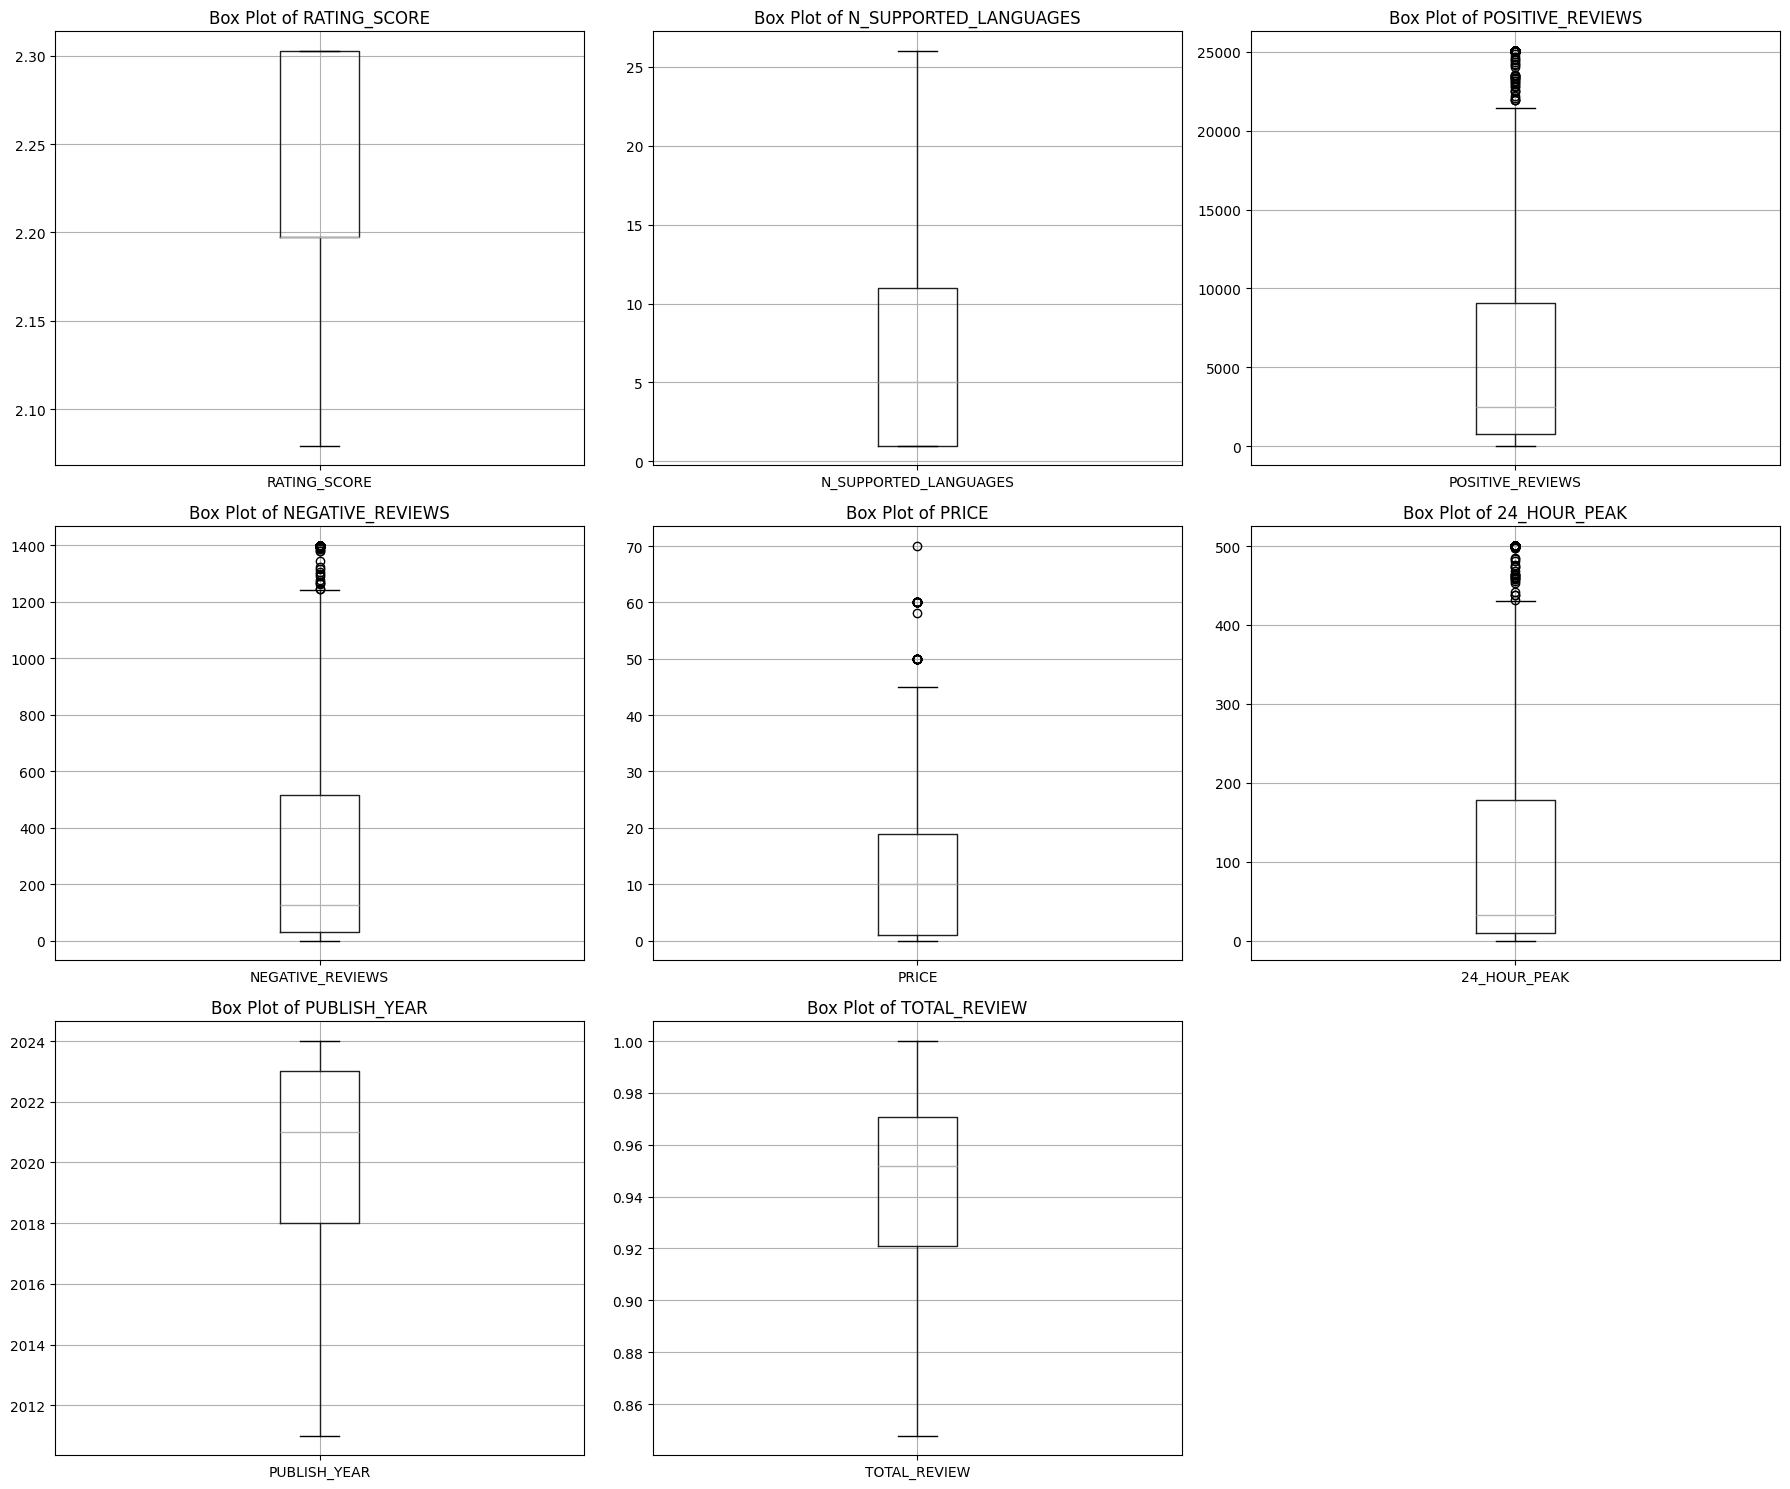

In [105]:
plot_boxplots(df, exclude_columns=['Windows', 'macOS', 'Linux'])


## Normalization/Standardization

## Descriptive Statistics


In [106]:
df.describe()

RATING_SCORE  N_SUPPORTED_LANGUAGES  POSITIVE_REVIEWS  \
count   1846.000000            1846.000000       1846.000000   
mean       2.239333               6.761105       6767.123510   
std        0.052845               5.838738       8595.296063   
min        2.079442               1.000000         34.000000   
25%        2.197225               1.000000        742.750000   
50%        2.197225               5.000000       2448.000000   
75%        2.302585              11.000000       9092.250000   
max        2.302585              26.000000      25047.500000   

       NEGATIVE_REVIEWS        PRICE  24_HOUR_PEAK  PUBLISH_YEAR        Linux  \
count       1846.000000  1846.000000   1846.000000   1846.000000  1846.000000   
mean         375.270856    11.816029    133.022210   2020.204767     0.243229   
std          486.745020    12.273554    182.168664      3.141867     0.429148   
min            0.000000     0.000000      0.000000   2011.000000     0.000000   
25%           32.000000     0.990000      9.000000   2018.000000     0.000000   
50%          126.000000     9.990000     33.000000   2021.000000     0.000000   
75%          517.000000    18.990000    177.750000   2023.000000     0.000000   
max         1397.500000    69.990000    500.000000   2024.000000     1.000000   

       Windows        macOS  TOTAL_REVIEW  
count   1846.0  1846.000000   1846.000000  
mean       1.0     0.362405      0.944507  
std        0.0     0.480825      0.033598  
min        1.0     0.000000      0.847840  
25%        1.0     0.000000      0.921026  
50%        1.0     0.000000      0.951692  
75%        1.0     1.000000      0.970708  
max        1.0     1.000000      1.000000

## Correlation Heatmap

[Text(0.5, 0, 'RATING_SCORE'),
 Text(1.5, 0, 'N_SUPPORTED_LANGUAGES'),
 Text(2.5, 0, 'POSITIVE_REVIEWS'),
 Text(3.5, 0, 'NEGATIVE_REVIEWS'),
 Text(4.5, 0, 'PRICE'),
 Text(5.5, 0, '24_HOUR_PEAK'),
 Text(6.5, 0, 'PUBLISH_YEAR'),
 Text(7.5, 0, 'TOTAL_REVIEW')]

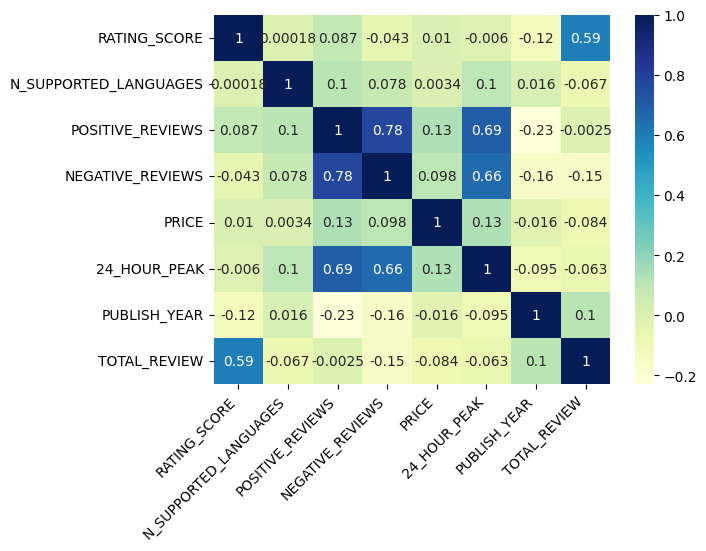

In [107]:
ax = sb.heatmap(numerical_df.corr(),annot=True, cmap="YlGnBu")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [108]:
corr_matrix = numerical_df.corr()
correlations = corr_matrix['PRICE'].abs().sort_values(ascending=False)

correlation_info = pd.DataFrame({
    'Correlation': corr_matrix['PRICE'].loc[correlations.index],
    'Type': ['+' if corr_matrix['PRICE'][col] > 0 else '-' for col in correlations.index]
})

print("\nCorrelation of features with the target (PRICE):")
correlation_info


Correlation of features with the target (PRICE):


Correlation Type
PRICE                     1.000000    +
POSITIVE_REVIEWS          0.133566    +
24_HOUR_PEAK              0.128129    +
NEGATIVE_REVIEWS          0.098387    +
TOTAL_REVIEW             -0.084215    -
PUBLISH_YEAR             -0.015874    -
RATING_SCORE              0.010009    +
N_SUPPORTED_LANGUAGES     0.003400    +

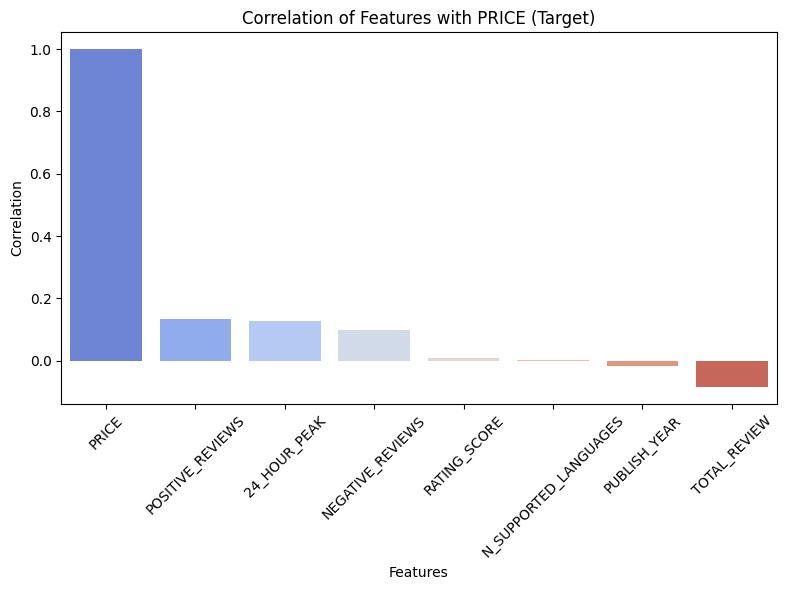

In [109]:
target_corr =  corr_matrix['PRICE'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')
plt.title('Correlation of Features with PRICE (Target)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Histograms

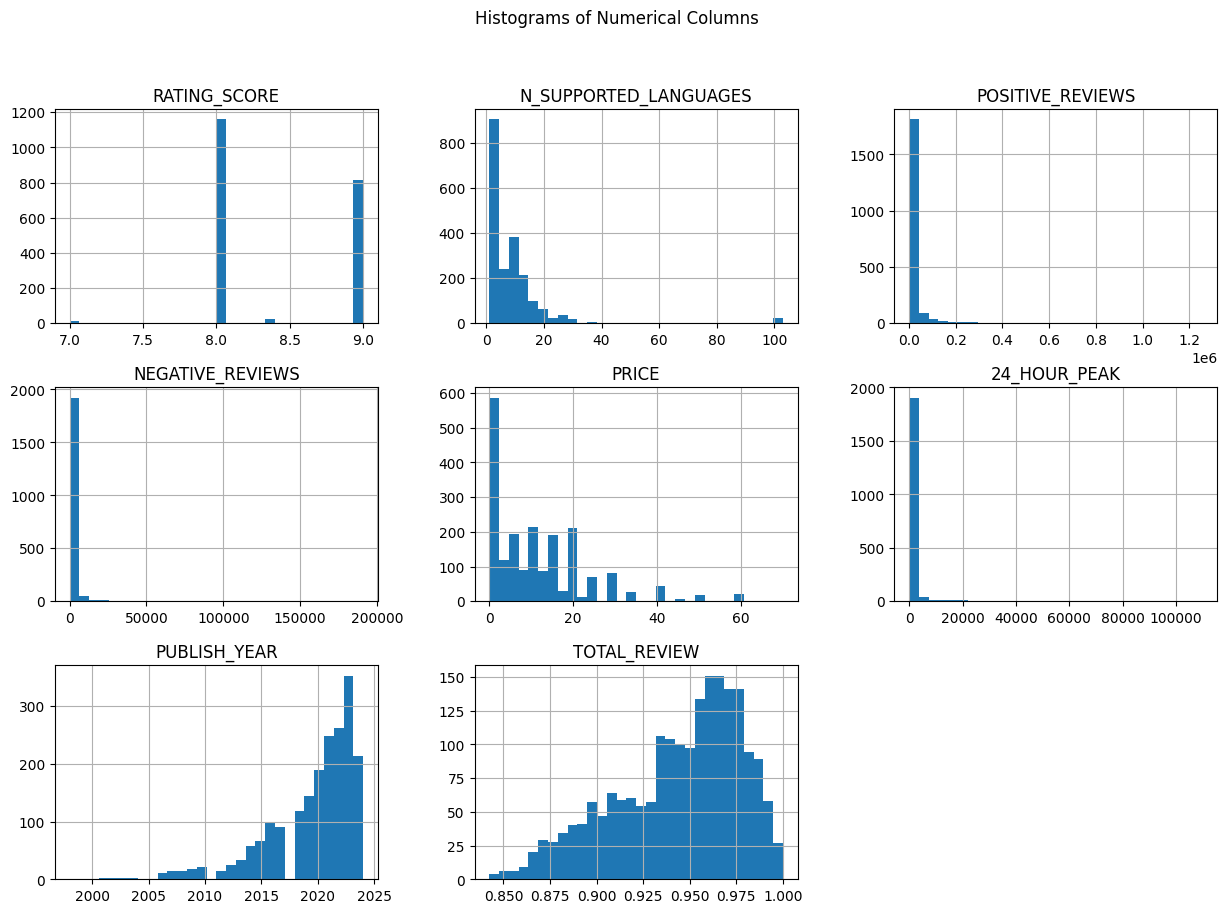

In [110]:
numerical_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

##  Scatter Plots

## Pair Plots

### Top 20 DEVELOPERS

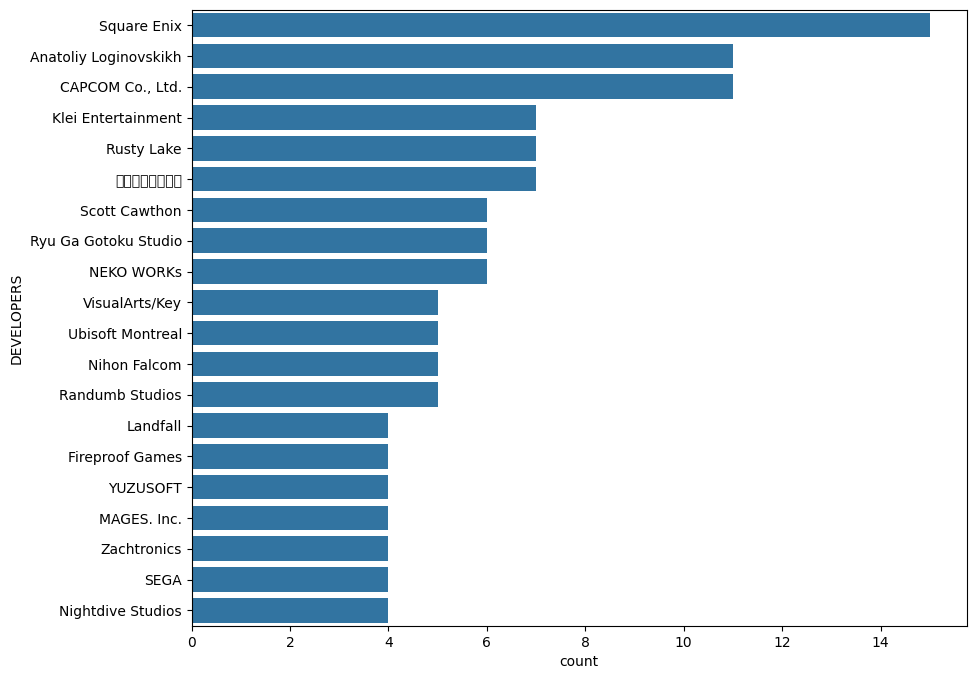

In [111]:
import warnings

warnings.filterwarnings("ignore")

# Explode
df_exploded = df.explode('DEVELOPERS')

top_20_developers = df_exploded['DEVELOPERS'].value_counts().nlargest(20).index

df_top_20 = df_exploded[df_exploded['DEVELOPERS'].isin(top_20_developers)]

plt.figure(figsize=(10, 8))

sb.countplot(y='DEVELOPERS', data=df_top_20, order=top_20_developers)
plt.show()

### Top 10 GENRES

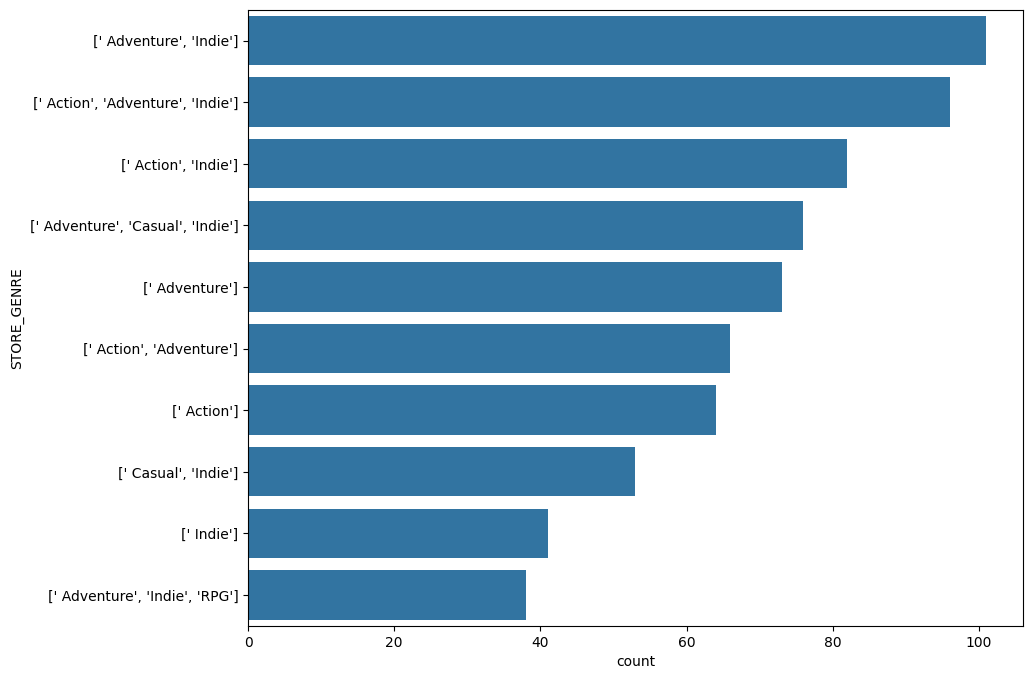

In [112]:
# Explode
df_exploded = df.explode('STORE_GENRE')

top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

plt.figure(figsize=(10, 8))

sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

### Distribution of Publish Year

In [113]:
median_publish_year = df['PUBLISH_YEAR'].median()
filled_publish_year = df['PUBLISH_YEAR'].fillna(median_publish_year)

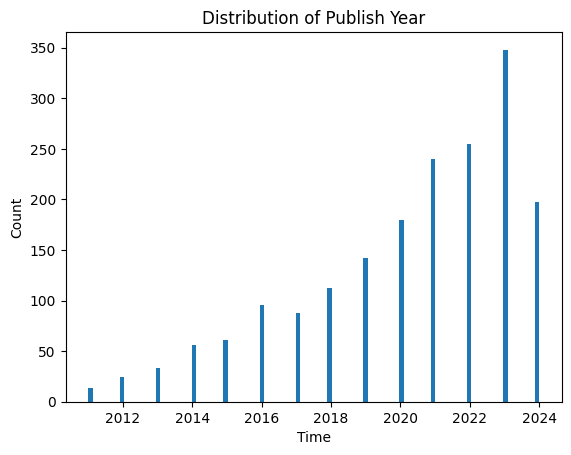

In [114]:
# Plot the histogram
plt.hist(filled_publish_year, bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()


### Platform Analysis

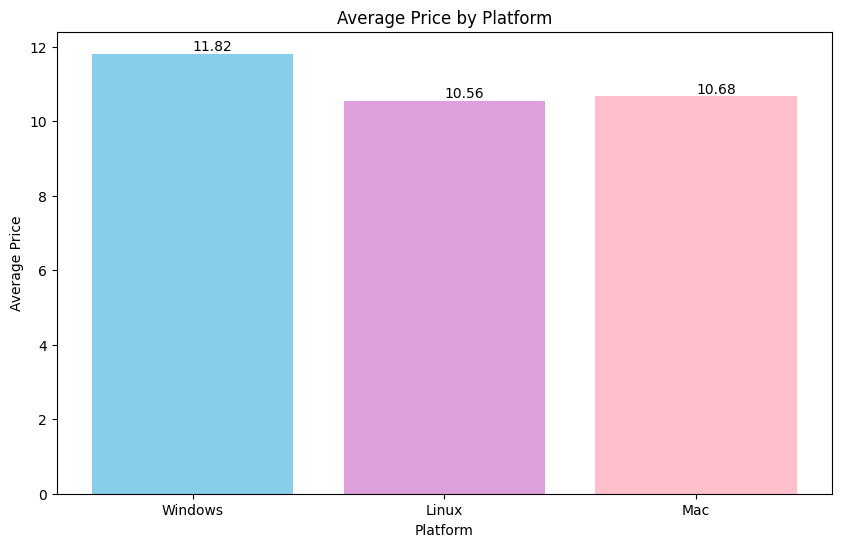

In [115]:
windows_avg_price = df.loc[df['Windows'] == 1, 'PRICE'].mean()
linux_avg_price = df.loc[df['Linux'] == 1, 'PRICE'].mean()
mac_avg_price = df.loc[df['macOS'] == 1, 'PRICE'].mean()

platforms = ['Windows', 'Linux', 'Mac']
average_prices = [windows_avg_price, linux_avg_price, mac_avg_price]
colors = ['skyblue', 'plum', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(platforms, average_prices, color=colors)

for bar, avg_price in zip(bars, average_prices):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg_price, 2), va='bottom')  # va: vertical alignment

plt.title('Average Price by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Price')
plt.show()

In [116]:

df['PlatformCount'] = df[['Windows', 'Linux', 'macOS']].sum(axis=1)

platform_groups = df.groupby('PlatformCount').agg({
    'RATING_SCORE': 'mean',
    'POSITIVE_REVIEWS': 'mean',
    'PRICE': 'mean',
    'NEGATIVE_REVIEWS': 'mean',
})

platform_groups.reset_index(inplace=True)

platform_groups

PlatformCount  RATING_SCORE  POSITIVE_REVIEWS      PRICE  NEGATIVE_REVIEWS
0              1      2.235576       6065.616518  12.764089        345.803125
1              2      2.244166       7098.173653   9.430120        385.961078
2              3      2.245950       8489.360969  11.140179        450.355867

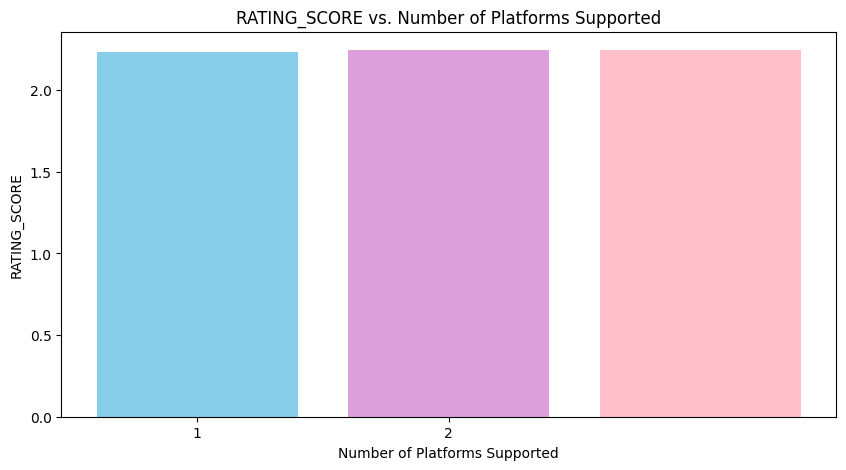

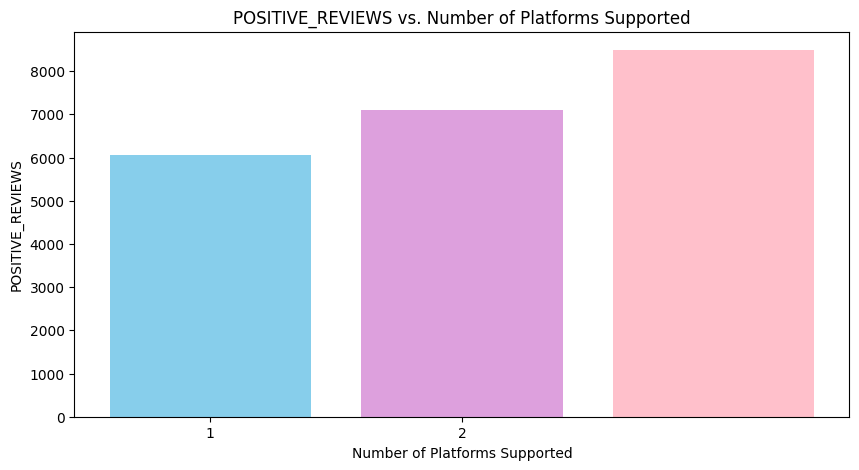

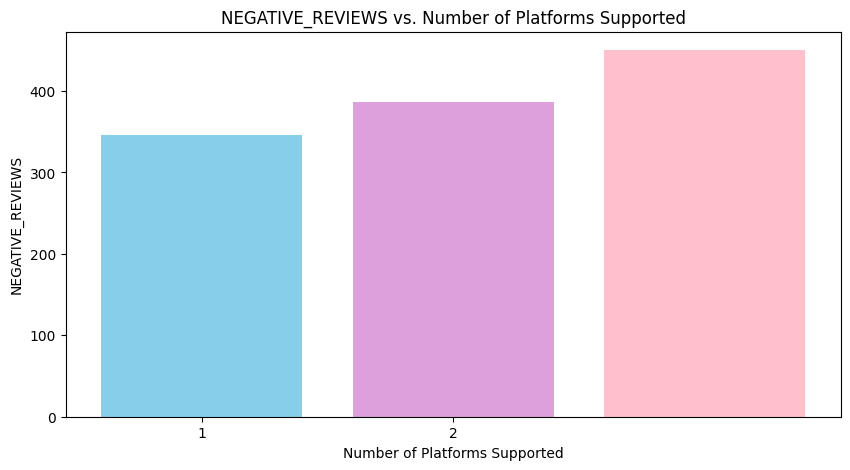

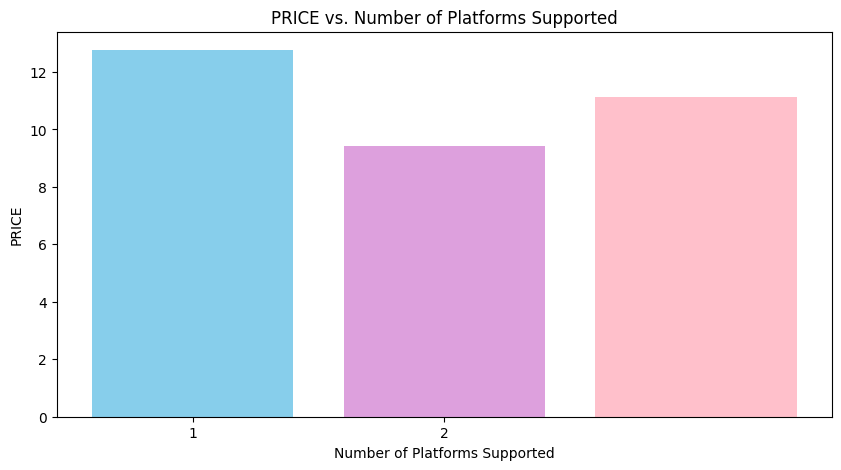

In [117]:
colors = ['skyblue', 'plum', 'pink']
metrics = ['RATING_SCORE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', 'PRICE']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

### Plot the average price for each year

In [118]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


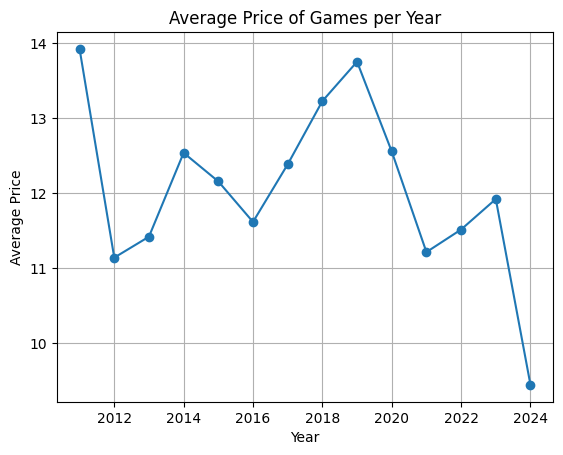

In [119]:
average_price_per_year = df.groupby('PUBLISH_YEAR')['PRICE'].mean()

# Plot the average price for each year
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Games per Year')
plt.grid(True)
plt.show()

###  Relation between Price and Genre

In [122]:
df['STORE_GENRE'] = df['STORE_GENRE'].astype(str)

df['PRIMARY_GENRE'] = df['STORE_GENRE'].apply(lambda x: re.findall(r'\b[A-Za-z]+\b', x)[0] if re.findall(r'\b[A-Za-z]+\b', x) else None)


Mean Prices by Genre


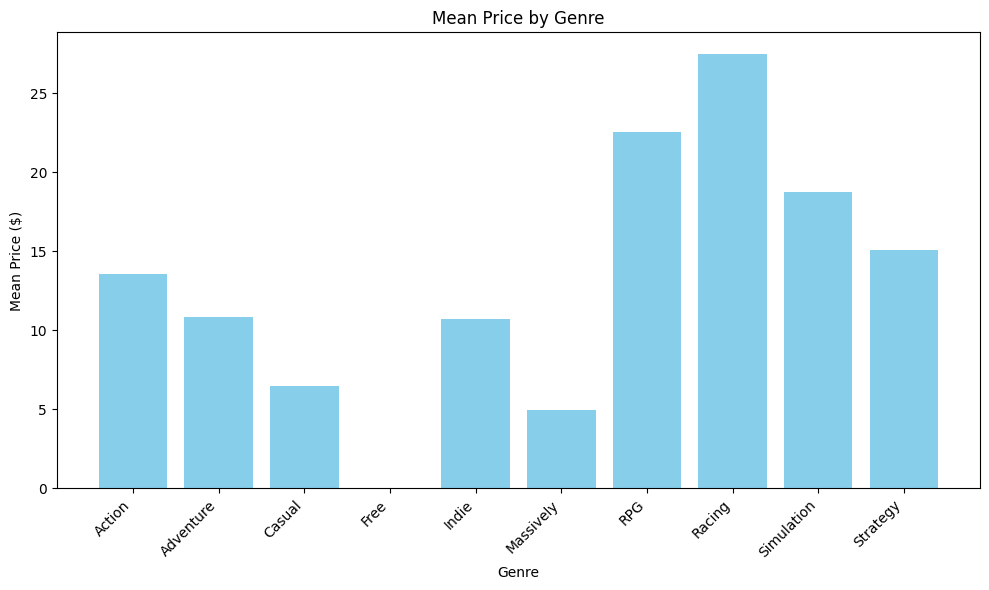

In [123]:
# Mean Price Difference by Genre
print("Mean Prices by Genre")
mean_prices_by_genre = df.groupby('PRIMARY_GENRE')['PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_prices_by_genre['PRIMARY_GENRE'], mean_prices_by_genre['PRICE'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 20 Games by Genre


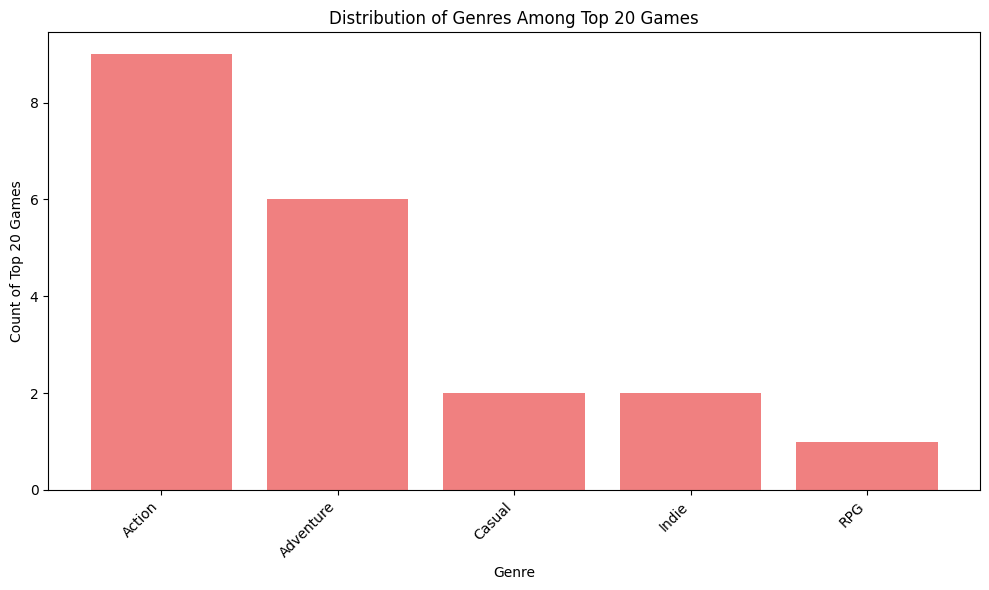

In [124]:
# Comparison of Top 20 Games based on Genre

top_20_games = df.sort_values(by='RATING_SCORE', ascending=False).head(20)

top_20_genre_counts = top_20_games['PRIMARY_GENRE'].value_counts().reset_index()
top_20_genre_counts.columns = ['PRIMARY_GENRE', 'COUNT']
print("Top 20 Games by Genre")

plt.figure(figsize=(10, 6))
plt.bar(top_20_genre_counts['PRIMARY_GENRE'], top_20_genre_counts['COUNT'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count of Top 20 Games')
plt.title('Distribution of Genres Among Top 20 Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Summary statistics for the PRICE column

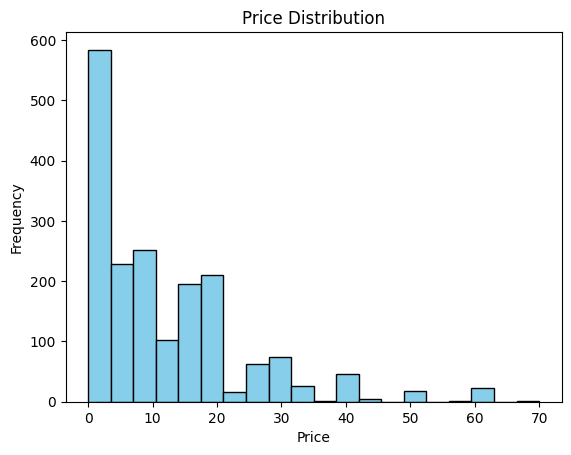

In [125]:
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

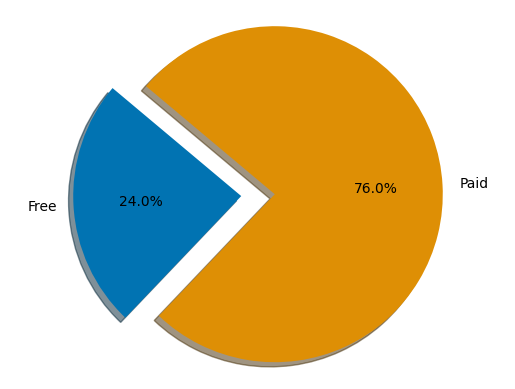

In [126]:
df = df.assign(**{"FREE": df.PRICE == 0})

free_prices_dict = dict(df.FREE.value_counts())
labels = "Free", "Paid"
sizes = [free_prices_dict[True], free_prices_dict[False]]
explode = (0.2, 0)

with sb.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [127]:
price_summary = df['PRICE'].describe()
price_summary

count    1846.000000
mean       11.816029
std        12.273554
min         0.000000
25%         0.990000
50%         9.990000
75%        18.990000
max        69.990000
Name: PRICE, dtype: float64

### Analyze the correlation between PRICE and POSITIVE_REVIEWS

In [ ]:

price_positive_corr = df[['PRICE', 'POSITIVE_REVIEWS']].dropna()
correlation = price_positive_corr.corr().loc['PRICE', 'POSITIVE_REVIEWS']

plt.figure(figsize=(10, 6))
sns.regplot(x='PRICE', y='POSITIVE_REVIEWS', data=price_positive_corr, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Price and Positive Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Positive Reviews')
plt.grid(True)
plt.show()

correlation

### Developer Analysis

In [128]:
developer_game_count = df['DEVELOPERS'].value_counts()

developer_price_summary = df.groupby('DEVELOPERS')['PRICE'].mean().sort_values(ascending=False)

developer_summary = pd.DataFrame({
    'Game Count': developer_game_count,
    'Average Price': developer_price_summary
}).dropna().sort_values(by='Game Count', ascending=False)

developer_summary

Game Count  Average Price
DEVELOPERS                                      
Square Enix                    15      38.262667
CAPCOM Co., Ltd.               11      30.672727
Anatoliy Loginovskikh          11       1.174545
上海アリス幻樂団                        7      14.990000
Klei Entertainment              7      15.705714
...                           ...            ...
KEIZO                           1      24.990000
KAIJYU-09                       1      24.990000
KAGAMI WORKS                    1       1.990000
K-D Lab                         1       6.990000
Mihai Morosanu                  1       0.990000

[1524 rows x 2 columns]

### Relationship between TOTAL_REVIEW and PRICE

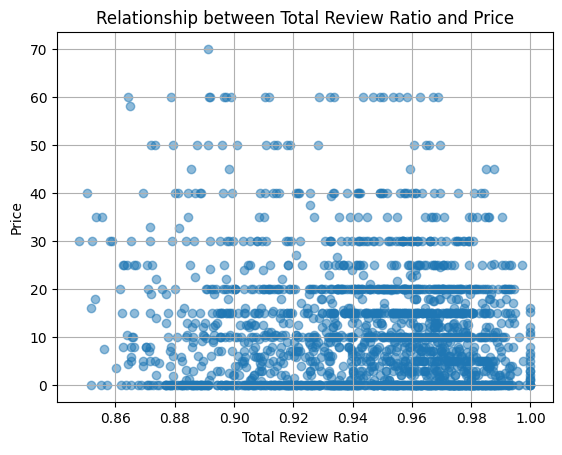

In [129]:
# Plot the relationship between TOTAL_REVIEW and PRICE
plt.scatter(df['TOTAL_REVIEW'], df['PRICE'], alpha=0.5)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.grid(True)
plt.show()


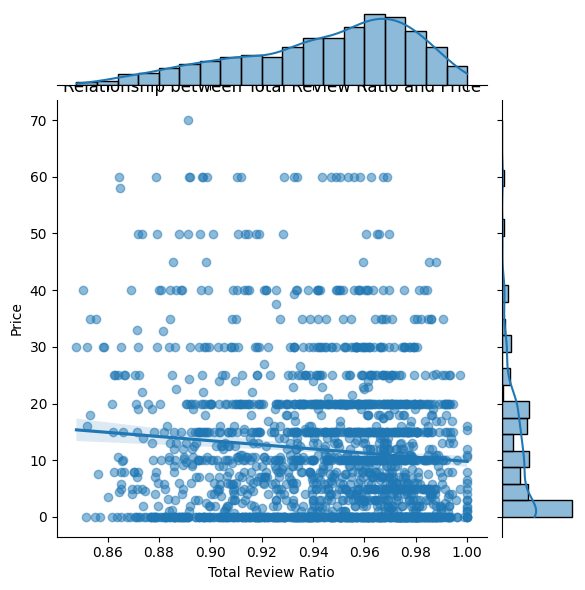

In [130]:
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


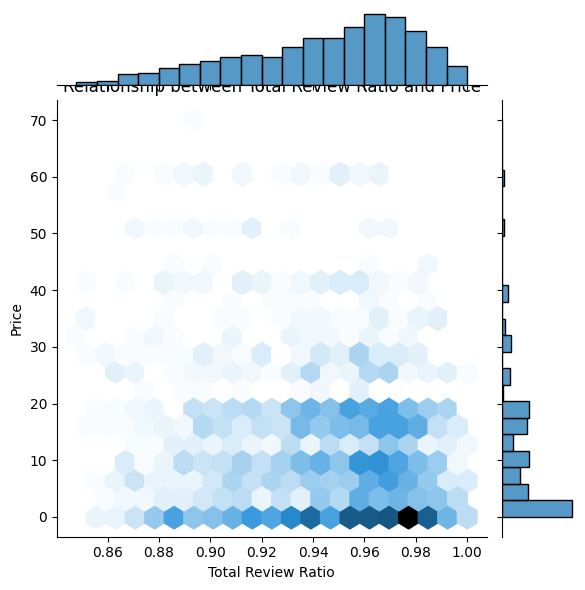

In [131]:
# Create a hexbin plot
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='hex', gridsize=20)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


In [132]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

30                                    Two Cubes
110                                  彼方的她-Aliya
268                   Geneforge 2 - Infestation
281                         风与鸟 - Wind and Bird
286            我在疗养院送人上西天 / Last Stand Delivery
343                Cats and Seek : at Dino Park
348                            Owinka Shooter 2
350                         Of Mice and Moggies
358                          Ghost Girl Lasling
363                             Monkey Business
411                      Liminal Border Part II
440                                Harvest Hunt
472     Is this Game Trying to Kill Me? Preface
693                              Stunt Paradise
819                                  Pogo Rogue
874       Sable's Grimoire: A Dragon's Treasure
1056                            Genome Guardian
1902                               祈風 Inorikaze
1941                                Ego's Spark
1944                                     CHAIRS
Name: NAME, dtype: object

In [133]:
df['TOTAL_REVIEW'].nlargest(n=25)

30      1.000000
110     1.000000
268     1.000000
281     1.000000
286     1.000000
343     1.000000
348     1.000000
350     1.000000
358     1.000000
363     1.000000
411     1.000000
440     1.000000
472     1.000000
693     1.000000
819     1.000000
874     1.000000
1056    1.000000
1902    1.000000
1941    1.000000
1944    1.000000
1319    0.998583
519     0.997389
1326    0.997205
830     0.996124
1237    0.996007
Name: TOTAL_REVIEW, dtype: float64

In [134]:
df.query("TOTAL_REVIEW >= 0.99").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]

NAME            DEVELOPERS  \
30                                 Two Cubes                 Rombo   
350                      Of Mice and Moggies            Bippinbits   
1941                             Ego's Spark               Satsuki   
1902                            祈風 Inorikaze       Twilight -日月之境-   
1056                         Genome Guardian             Alpherior   
...                                      ...                   ...   
1216                              Purrgatory      Niv (Darvin Heo)   
1583                      Submachine: Legacy       Mateusz Skutnik   
1593                          Orbo's Odyssey  Feverdream Softworks   
1223                                      Ib                 kouri   
900   Dangeresque: The Roomisode Triungulate           Videlectrix   

                                            STORE_GENRE  TOTAL_REVIEW  
30                              [' Adventure', 'Indie']      1.000000  
350                                          [' Indie']      1.000000  
1941                                     [' Adventure']      1.000000  
1902                  [' Adventure', 'Casual', 'Indie']      1.000000  
1056              [' Action', 'Casual', 'Indie', 'RPG']      1.000000  
...                                                 ...           ...  
1216  [' Adventure', 'Casual', 'Free to Play', 'Indie']      0.990341  
1583                            [' Adventure', 'Indie']      0.990310  
1593                           [' Action', 'Adventure']      0.990215  
1223                            [' Adventure', 'Indie']      0.990202  
900                             [' Adventure', 'Indie']      0.990025  

[76 rows x 4 columns]